In [13]:
from tensorflow.keras.layers import TimeDistributed, Dense, Input, LSTM, Bidirectional, Flatten,BatchNormalization,Dropout,GRU
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
#from tensorflow as keras
import sklearn.metrics as sm
import matplotlib.pyplot as mp
tf.random.set_seed(22)
np.random.seed(22)
from tensorflow import keras
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms

In [14]:
C=np.genfromtxt('2.txt',dtype='f8',usecols=range(1))
C=C.reshape(-1,1)
print(C.shape)

(2160, 1)


In [15]:
A=np.zeros(9*1).reshape(-1,9,1)
seq_length=8
delay=1
data_=[]
for i in range(len(C)-seq_length-delay+1):
    data_.append(C[i:i+seq_length+delay])
C=np.array(data_)
print(C.shape)
print(A.shape)
A=np.concatenate((A,C))
data_=A[1:,:,:]
print(data_.shape)

(2152, 9, 1)
(1, 9, 1)
(2152, 9, 1)


In [16]:
data_train=data_[0:1720,:,:]
Train=data_train
print(data_train.shape)
data_test=data_[1720:,:,:]
print(data_test.shape)

(1720, 9, 1)
(432, 9, 1)


In [17]:
np.random.shuffle(data_train)
#x=data_train[:,:6,0:]
x=data_train[:,:8,0:]
y=data_train[:,-1,0:]
split_n=int(data_train.shape[0]*0.8)
train_x=x[:split_n].astype('float32')#.reshape(-1,19*5)
test_x=x[split_n:].astype('float32')#.reshape(-1,19*5)
train_y=y[:split_n].astype('float32')#.reshape(-1,6)
test_y=y[split_n:].astype('float32')#.reshape(-1,6)
print(train_x.shape)
print(test_y.shape)
mean=train_x.mean(axis=0)
std=train_x.std(axis=0)
mean_1=train_y.mean(axis=0)
std_1=train_y.std(axis=0)
train_x=(train_x-mean)/std
test_x=(test_x-mean)/std
#predict_x=(predict_x-mean)/std
train_y=(train_y-mean_1)/std_1
#train_y=train_y/100
test_y=(test_y-mean_1)/std_1
#test_y=test_y/100"

(1376, 8, 1)
(344, 1)


In [18]:
from sklearn.svm import SVR
train_x=train_x.reshape(-1,8*1)
model=SVR(kernel='rbf')
model.fit(train_x,train_y)

D:\software\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [19]:
###Train数据
x=Train[:,:8,0:]
y=Train[:,-1,0]
x=(x-mean)/std
x=x.reshape(-1,8*1)
#x=x.reshape(-1,36)
pred_y=model.predict(x)
pred_y=(pred_y*1)*std_1+mean_1
loss_1=sm.mean_squared_error(y,pred_y)

print('mse:',loss_1)

loss_1=np.sqrt(sm.mean_squared_error(y,pred_y))
print('rmse:',loss_1)

loss_2=sm.mean_absolute_error(y,pred_y)
print('mae:',loss_2)

print('R2:',sm.r2_score(y,pred_y))
mape=np.mean(np.abs((pred_y - y) / y)) * 100
print('MAPE:',mape)

mse: 106672.68866306706
rmse: 326.6078515024816
mae: 259.69356374282546
R2: 0.9951076246422955
MAPE: 0.8873334015358019


In [20]:
np.savetxt('val_real_2.txt',y,fmt='%f',delimiter=' ')
np.savetxt('val_prediction_2.txt',pred_y,fmt='%f',delimiter=' ')

In [21]:
#8
x=data_test[:,:8,0:]
y=data_test[:,-1,0]
x=(x-mean)/std
x=x.reshape(-1,8*1)
#x=x.reshape(-1,36)
pred_y=model.predict(x)
pred_y=(pred_y*1)*std_1+mean_1
loss_1=np.sqrt(sm.mean_squared_error(y,pred_y))
print('rmse:',loss_1)

loss_2=sm.mean_absolute_error(y,pred_y)
print('mae:',loss_2)

mape=np.mean(np.abs((pred_y - y) / y)) * 100
print('MAPE:',mape)

y_pred=pred_y
IA=1-(np.sum(np.square(y-y_pred)))/(np.sum(np.square(np.abs(y_pred-np.mean(y))+np.abs(y-np.mean(y)))))
print('IA',IA)

y_true=y
y_predict=pred_y
K_1=np.sqrt(np.sum(np.square((y_true-y_predict)))/365)
K_2=np.sqrt(np.sum(np.square(y_true))/365)
K_3=np.sqrt(np.sum(np.square(y_predict))/365)
TIC=K_1/(K_2+K_3)
print('TIC',TIC)


print('R2:',sm.r2_score(y,pred_y))




rmse: 398.38975398303523
mae: 318.42308346051
MAPE: 1.1737524858512023
IA 0.9968697460454374
TIC 0.0071075635206965275
R2: 0.9876189739061003


In [22]:
np.savetxt('test_real_2.txt',y,fmt='%f',delimiter=' ')
np.savetxt('test_prediction_2.txt',pred_y,fmt='%f',delimiter=' ')

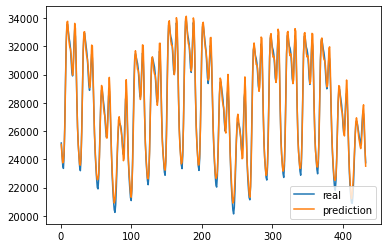

In [23]:
import matplotlib.pyplot as plt
I=[]
for i in range(432):
    I.append(i+1)
I=np.array(I)
plt.figure()
plt.plot(I,y,label='real')
plt.plot(I,pred_y,label='prediction')
plt.legend()
plt.show()

In [24]:
##直接求和预测
b_1=np.genfromtxt('test_prediction_1.txt',dtype='f8',usecols=range(1))
b_2=np.genfromtxt('test_prediction_2.txt',dtype='f8',usecols=range(1))


b=b_1+b_2
#+b_15+b_16+b_17+b_18+b_19+b_20+b_21+b_22+b_23+b_24+b_25+b_26+b_27+b_28+b_29+b_30
print(b.shape)

(432,)


In [25]:
B=np.genfromtxt('TRUE-西班牙.txt',dtype='f8',usecols=range(1))

In [26]:
#8
y=B
pred_y=b

loss_1=np.sqrt(sm.mean_squared_error(y,pred_y))
print('rmse:',loss_1)

loss_2=sm.mean_absolute_error(y,pred_y)
print('mae:',loss_2)

mape=np.mean(np.abs((pred_y - y) / y)) * 100
print('MAPE:',mape)

y_pred=pred_y
IA=1-(np.sum(np.square(y-y_pred)))/(np.sum(np.square(np.abs(y_pred-np.mean(y))+np.abs(y-np.mean(y)))))
print('IA',IA)

y_true=y
y_predict=pred_y
K_1=np.sqrt(np.sum(np.square((y_true-y_predict)))/365)
K_2=np.sqrt(np.sum(np.square(y_true))/365)
K_3=np.sqrt(np.sum(np.square(y_predict))/365)
TIC=K_1/(K_2+K_3)
print('TIC',TIC)


print('R2:',sm.r2_score(y,pred_y))




rmse: 568.1640775317362
mae: 427.8838499629629
MAPE: 1.604153741447326
IA 0.9939028466653571
TIC 0.010133020863350556
R2: 0.9769790525954668


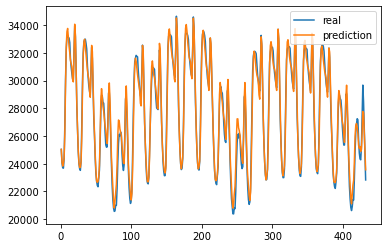

In [28]:
import matplotlib.pyplot as plt
I=[]
for i in range(432):
    I.append(i+1)
I=np.array(I)
plt.figure()
plt.plot(I,y,label='real')
plt.plot(I,pred_y,label='prediction')
plt.legend()
plt.show()

In [29]:
np.savetxt('VMD-SVR-xibanya.txt',pred_y,fmt='%f',delimiter=' ')